(-0.5, 1154.5)
(-0.5, 1154.5)


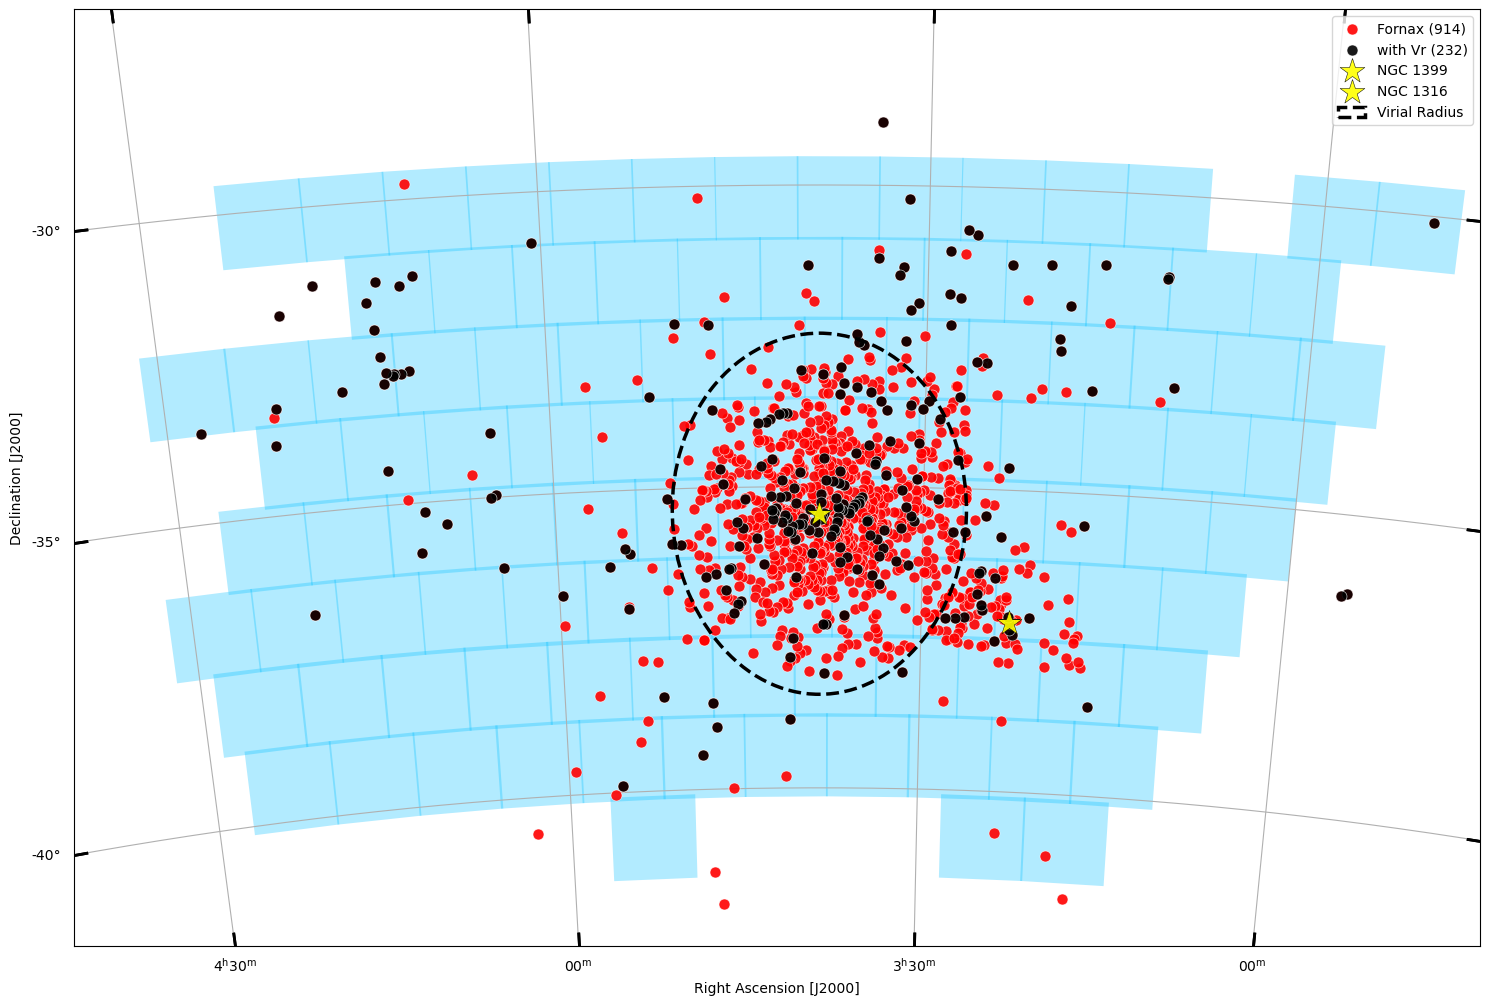

In [14]:
import ligo.skymap.plot

from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from astropy.coordinates import SkyCoord
import astropy.units as u

import pandas as pd
import numpy as np
import math

size = 500
fig = plt.figure ( figsize = (15, 15), dpi = 100 )
center = SkyCoord.from_name('NGC 1399')
ax = plt.axes(projection='astro zoom', center = center, radius = 15*u.deg )

x = 'RA_4'; y = 'DEC_4'
ax.scatter ( x, y, data = FornaxMil, s = size*0.5, alpha = 0.9, edgecolors = 'white', color = 'red', marker = '.', linewidth = 0.4, 
            label = 'Fornax (%i)' % (len(FornaxMil)-len(FornaxVR)),  transform = ax.get_transform('world'), zorder = 8 )

ax.scatter ( x, y, data = FornaxVR, s = size*0.5, alpha = 0.9, edgecolors = 'white', color = 'black', marker = '.', linewidth = 0.4, 
            label = 'with Vr (%i)' % (len(FornaxVR)),  transform = ax.get_transform('world'), zorder = 8 )

for NGC, marker, color in zip(['NGC 1399', 'NGC 1316'], ['*', '*'], ['yellow', 'yellow']):
    coord = SkyCoord.from_name( NGC ); ra = coord.ra.deg; dec = coord.dec.deg
    ax.scatter ( ra, dec, s = size*0.7, alpha = 0.9, edgecolors = 'black', color = color, marker = marker, linewidth = 0.4, 
                label = NGC, transform = ax.get_transform('world'), zorder = 9 )

virial_radius = plt.Circle( (center.ra.deg, center.dec.deg), 3, 
                           fill = False,  linewidth = 2.5, linestyle = '--', color = 'black', 
                           transform = ax.get_transform('world'), label = 'Virial Radius', zorder = 9  )
ax.add_artist( virial_radius )

for index, row in iDR4_zp_Fornax.iterrows():
    w = 9000*0.55/3600/np.cos(math.radians(row['DEC'])); h = 9000*0.55/3600 
    ax.add_patch ( Rectangle ( (row['RA'], row['DEC']), w, h, alpha = 0.3, edgecolor = 'None', facecolor = 'deepskyblue', fill = True, lw = 1, transform = ax.get_transform('world'), zorder = 1 ) )

def custom_axes ( a ):
    a.yaxis.set_ticks_position ( 'both' )
    a.xaxis.set_ticks_position ( 'both' )
    a.tick_params ( which = 'major', length = 10 )
    a.tick_params ( which = 'minor', length = 5 )
    a.tick_params ( direction = 'in', pad = 10 )  
    a.tick_params ( which = 'both', width = 2 )
    plt.setp ( a.spines.values(), linewidth = 1.5 )
    a.grid()

custom_axes ( ax )
print(ax.get_xlim()); ax.set_xlim(100,1000)
print(ax.get_ylim()); ax.set_ylim(300,900)
#ax.set_aspect ( 1.0/ax.get_data_ratio(), adjustable = 'box' )
ax.set_xlabel ( "Right Ascension [J2000]" ); ax.set_ylabel ( "Declination [J2000]" )
plt.legend()
plt.tight_layout()
plt.savefig ( "figures/SkyProjection_Fornax.jpg", dpi = 250, facecolor = 'w', edgecolor = 'w',
            orientation = 'portrait', format = None, transparent = False, 
            bbox_inches = 'tight', pad_inches = 0.01 )
plt.show()